In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Проведем небольшую предобработку данных, т.к. оказалось, что в датасете есть несколько неподдерживаемых файлов (тип файла не поддерживается TensorFlow)

In [2]:
from distutils.dir_util import copy_tree

from_dir = '/kaggle/input/fast-food-classification-dataset/Fast Food Classification V2/Train'
to_dir = '/kaggle/working/Train'
copy_tree(from_dir,to_dir)

['/kaggle/working/Train/Donut/Donut (448).jpeg',
 '/kaggle/working/Train/Donut/Donut (438).jpeg',
 '/kaggle/working/Train/Donut/Donut (15).jpeg',
 '/kaggle/working/Train/Donut/Donut (950).jpeg',
 '/kaggle/working/Train/Donut/Donut (77).jpeg',
 '/kaggle/working/Train/Donut/Donut (346).jpeg',
 '/kaggle/working/Train/Donut/Donut (225).jpeg',
 '/kaggle/working/Train/Donut/Donut (877).jpeg',
 '/kaggle/working/Train/Donut/Donut (1251).jpeg',
 '/kaggle/working/Train/Donut/Donut (807).jpeg',
 '/kaggle/working/Train/Donut/Donut (1122).jpeg',
 '/kaggle/working/Train/Donut/Donut (1148).jpeg',
 '/kaggle/working/Train/Donut/Donut (395).jpeg',
 '/kaggle/working/Train/Donut/Donut (1343).jpeg',
 '/kaggle/working/Train/Donut/Donut (152).jpeg',
 '/kaggle/working/Train/Donut/Donut (891).jpeg',
 '/kaggle/working/Train/Donut/Donut (189).jpeg',
 '/kaggle/working/Train/Donut/Donut (234).jpeg',
 '/kaggle/working/Train/Donut/Donut (1285).jpeg',
 '/kaggle/working/Train/Donut/Donut (1116).jpeg',
 '/kaggle/workin

In [3]:
from_dir = '/kaggle/input/fast-food-classification-dataset/Fast Food Classification V2/Test'
to_dir = '/kaggle/working/Test'
copy_tree(from_dir,to_dir)

['/kaggle/working/Test/Donut/Donut-Test (70).jpeg',
 '/kaggle/working/Test/Donut/Donut-Test (119).jpeg',
 '/kaggle/working/Test/Donut/Donut-Test (41).jpeg',
 '/kaggle/working/Test/Donut/Donut-Test (105).jpeg',
 '/kaggle/working/Test/Donut/Donut-Test (10).jpeg',
 '/kaggle/working/Test/Donut/Donut-Test (34).jpeg',
 '/kaggle/working/Test/Donut/Donut-Test (168).jpeg',
 '/kaggle/working/Test/Donut/Donut-Test (183).jpeg',
 '/kaggle/working/Test/Donut/Donut-Test (195).jpeg',
 '/kaggle/working/Test/Donut/Donut-Test (110).jpeg',
 '/kaggle/working/Test/Donut/Donut-Test (57).jpeg',
 '/kaggle/working/Test/Donut/Donut-Test (162).jpeg',
 '/kaggle/working/Test/Donut/Donut-Test (181).jpeg',
 '/kaggle/working/Test/Donut/Donut-Test (161).jpeg',
 '/kaggle/working/Test/Donut/Donut-Test (30).jpeg',
 '/kaggle/working/Test/Donut/Donut-Test (37).jpeg',
 '/kaggle/working/Test/Donut/Donut-Test (93).jpeg',
 '/kaggle/working/Test/Donut/Donut-Test (27).jpeg',
 '/kaggle/working/Test/Donut/Donut-Test (40).jpeg',
 '/

In [4]:
from_dir = '/kaggle/input/fast-food-classification-dataset/Fast Food Classification V2/Valid'
to_dir = '/kaggle/working/Valid'
copy_tree(from_dir,to_dir)

['/kaggle/working/Valid/Donut/Donut-Valid (31).jpeg',
 '/kaggle/working/Valid/Donut/Donut-Valid (88).jpeg',
 '/kaggle/working/Valid/Donut/Donut-Valid (72).jpeg',
 '/kaggle/working/Valid/Donut/Donut-Valid (35).jpeg',
 '/kaggle/working/Valid/Donut/Donut-Valid (5).jpeg',
 '/kaggle/working/Valid/Donut/Donut-Valid (283).jpeg',
 '/kaggle/working/Valid/Donut/Donut-Valid (141).jpeg',
 '/kaggle/working/Valid/Donut/Donut-Valid (20).jpeg',
 '/kaggle/working/Valid/Donut/Donut-Valid (198).jpeg',
 '/kaggle/working/Valid/Donut/Donut-Valid (6).jpeg',
 '/kaggle/working/Valid/Donut/Donut-Valid (161).jpeg',
 '/kaggle/working/Valid/Donut/Donut-Valid (300).jpeg',
 '/kaggle/working/Valid/Donut/Donut-Valid (51).jpeg',
 '/kaggle/working/Valid/Donut/Donut-Valid (109).jpeg',
 '/kaggle/working/Valid/Donut/Donut-Valid (76).jpeg',
 '/kaggle/working/Valid/Donut/Donut-Valid (3).jpeg',
 '/kaggle/working/Valid/Donut/Donut-Valid (120).jpeg',
 '/kaggle/working/Valid/Donut/Donut-Valid (106).jpeg',
 '/kaggle/working/Valid

In [6]:
from pathlib import Path
import imghdr

data_dir = "/kaggle/working/Train"
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

/kaggle/working/Train/Hot Dog/Hot Dog - Train (42).jpg is not an image
/kaggle/working/Train/Hot Dog/Hot Dog - Train (73).jpg is not an image
/kaggle/working/Train/Hot Dog/Hot Dog - Train (75).jpg is not an image
/kaggle/working/Train/Hot Dog/Hot Dog - Train (11).jpg is not an image
/kaggle/working/Train/Hot Dog/Hot Dog - Train (39).jpg is not an image
/kaggle/working/Train/Hot Dog/Hot Dog - Train (59).jpg is a webp, not accepted by TensorFlow
/kaggle/working/Train/Donut/Donut (16).jpg is not an image


In [7]:
train_donut_delete = ["Donut (16).jpg"]

train_hotdog_delete = [
    "Hot Dog - Train (75).jpg",
    "Hot Dog - Train (59).jpg",
    "Hot Dog - Train (42).jpg",
    "Hot Dog - Train (73).jpg",
    "Hot Dog - Train (11).jpg",
    "Hot Dog - Train (39).jpg",
]

In [8]:
def delete_bad_files(dir_to_delete, list_of_bad_names):
    with os.scandir(dir_to_delete) as entries:
        for entry in entries:
            if entry.name in list_of_bad_names:
                file_to_delete = f"{dir_to_delete}{entry.name}"
                print(file_to_delete)
                os.remove(file_to_delete)

In [9]:
delete_bad_files(dir_to_delete="/kaggle/working/Train/Donut/", list_of_bad_names=train_donut_delete)
delete_bad_files(dir_to_delete="/kaggle/working/Train/Hot Dog/", list_of_bad_names=train_hotdog_delete)

/kaggle/working/Train/Donut/Donut (16).jpg
/kaggle/working/Train/Hot Dog/Hot Dog - Train (42).jpg
/kaggle/working/Train/Hot Dog/Hot Dog - Train (73).jpg
/kaggle/working/Train/Hot Dog/Hot Dog - Train (75).jpg
/kaggle/working/Train/Hot Dog/Hot Dog - Train (11).jpg
/kaggle/working/Train/Hot Dog/Hot Dog - Train (39).jpg
/kaggle/working/Train/Hot Dog/Hot Dog - Train (59).jpg


### Transfer Learning

In [10]:
PATH = "/kaggle/working/"

train_dir = os.path.join(PATH, "Train")
validation_dir = os.path.join(PATH, 'Valid')
test_dir = os.path.join(PATH, 'Test')

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

In [11]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
)

Found 14993 files belonging to 10 classes.


In [12]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
)

Found 3500 files belonging to 10 classes.


In [13]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
)

Found 1500 files belonging to 10 classes.


In [14]:
num_classes = len(train_dataset.class_names)

### Выведем девять изображений из тренировочного датасета

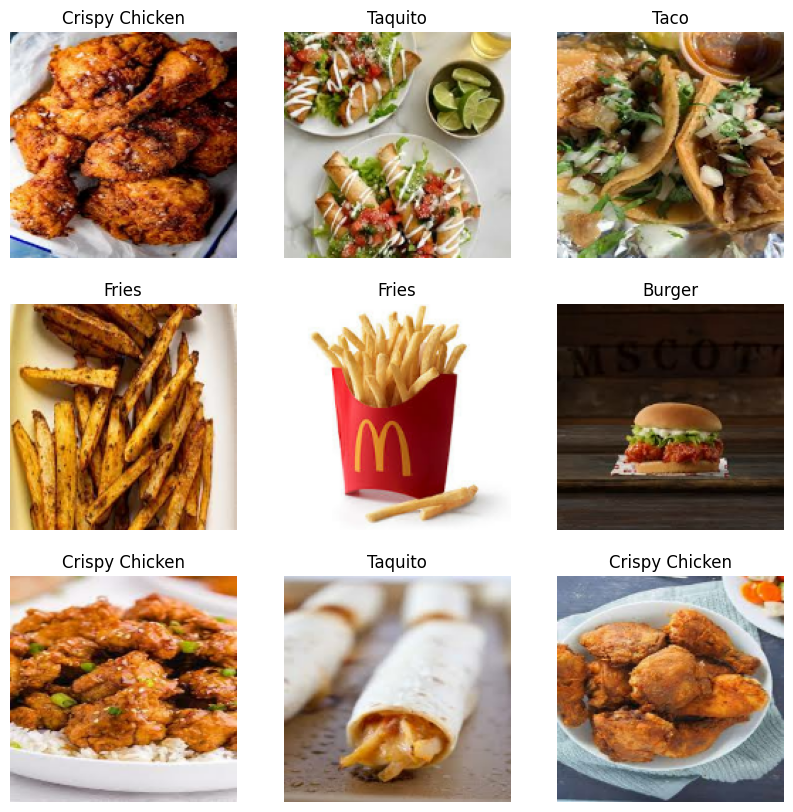

In [15]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Настройка набора данных

In [16]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [17]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

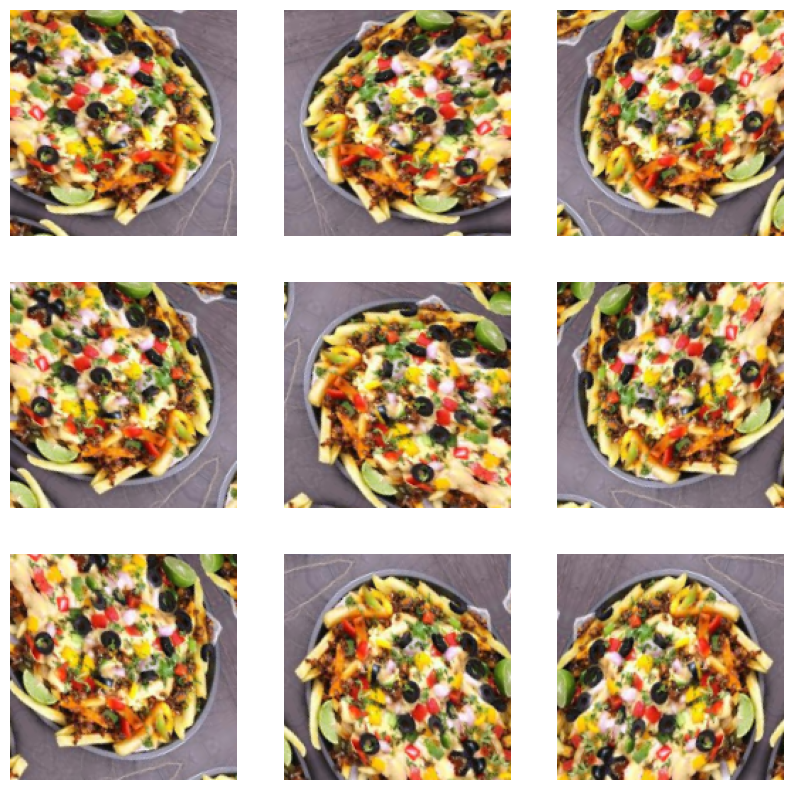

In [18]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [19]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [20]:
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [21]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights='imagenet',
)

9406464/9406464 [==============================] - 0s 0us/step


In [22]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


In [23]:
base_model.trainable = False

In [24]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [25]:
prediction_layer = tf.keras.layers.Dense(num_classes, activation='softmax')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 10)


In [26]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)

model = tf.keras.Sequential([
    base_model,
    global_average_layer,
    prediction_layer,
])

In [27]:
base_learning_rate = 0.0001

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(validation_dataset)

110/110 [==============================] - 5s 29ms/step - loss: 2.9291 - accuracy: 0.1000


In [29]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 2.93
initial accuracy: 0.10


### Обучение модели

In [30]:
history = model.fit(
    train_dataset,
    epochs=initial_epochs,
    validation_data=validation_dataset,
)

Epoch 1/10
469/469 [==============================] - 19s 33ms/step - loss: 2.2653 - accuracy: 0.2001 - val_loss: 2.0704 - val_accuracy: 0.2749
Epoch 2/10
469/469 [==============================] - 15s 32ms/step - loss: 1.9360 - accuracy: 0.3323 - val_loss: 1.9176 - val_accuracy: 0.3426
Epoch 3/10
469/469 [==============================] - 15s 32ms/step - loss: 1.8038 - accuracy: 0.3866 - val_loss: 1.8359 - val_accuracy: 0.3803
Epoch 4/10
469/469 [==============================] - 15s 32ms/step - loss: 1.7249 - accuracy: 0.4156 - val_loss: 1.7824 - val_accuracy: 0.3963
Epoch 5/10
469/469 [==============================] - 15s 32ms/step - loss: 1.6695 - accuracy: 0.4381 - val_loss: 1.7485 - val_accuracy: 0.4094
Epoch 6/10
469/469 [==============================] - 15s 31ms/step - loss: 1.6274 - accuracy: 0.4535 - val_loss: 1.7213 - val_accuracy: 0.4183
Epoch 7/10
469/469 [==============================] - 15s 32ms/step - loss: 1.5937 - accuracy: 0.4671 - val_loss: 1.6991 - val_accuracy:

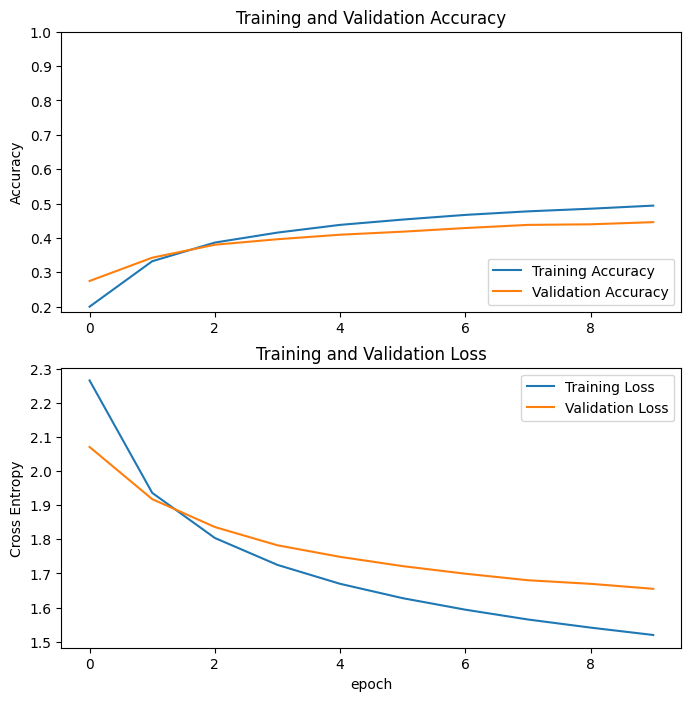

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### Fine Tuning

In [32]:
base_model.trainable = True

In [33]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


In [34]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 2270794 (8.66 MB)
Trainable params: 1874250 (7.15 MB)
Non-trainable params: 396544 (1.51 MB)
_________________________________________________________________


In [36]:
len(model.trainable_variables)

56

In [37]:
fine_tune_epochs = 20
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 10/30
469/469 [==============================] - 30s 42ms/step - loss: 1.9317 - accuracy: 0.3605 - val_loss: 1.7157 - val_accuracy: 0.4291
Epoch 11/30
469/469 [==============================] - 19s 39ms/step - loss: 1.4982 - accuracy: 0.4977 - val_loss: 1.6812 - val_accuracy: 0.4537
Epoch 12/30
469/469 [==============================] - 19s 40ms/step - loss: 1.3256 - accuracy: 0.5577 - val_loss: 1.5978 - val_accuracy: 0.4880
Epoch 13/30
469/469 [==============================] - 19s 40ms/step - loss: 1.1959 - accuracy: 0.6036 - val_loss: 1.5287 - val_accuracy: 0.5026
Epoch 14/30
469/469 [==============================] - 19s 40ms/step - loss: 1.0930 - accuracy: 0.6410 - val_loss: 1.4524 - val_accuracy: 0.5291
Epoch 15/30
469/469 [==============================] - 19s 40ms/step - loss: 1.0035 - accuracy: 0.6746 - val_loss: 1.4141 - val_accuracy: 0.5409
Epoch 16/30
469/469 [==============================] - 19s 40ms/step - loss: 0.9242 - accuracy: 0.7027 - val_loss: 1.3876 - val_ac

In [38]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

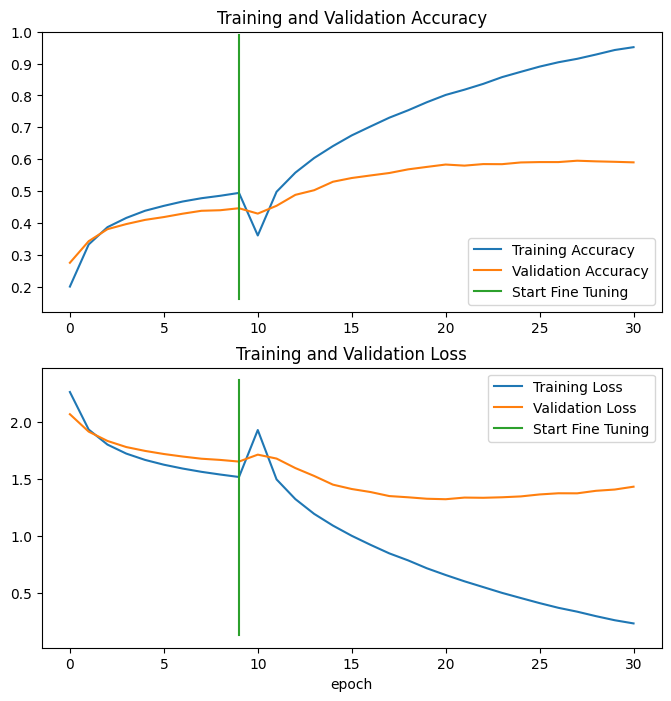

In [39]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.ylim([min(plt.ylim()),1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [40]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

47/47 [==============================] - 2s 45ms/step - loss: 1.3112 - accuracy: 0.6280
Test accuracy : 0.628000020980835


Predictions:
 [2 1 1 6 7 5 7 5 7 5 5 7 5 6 3 8 0 3 8 5 4 8 5 5 2 8 1 0 1 0 5 1]
Labels:
 [2 1 1 6 5 9 7 5 5 5 5 7 6 5 3 5 0 3 5 5 1 8 5 5 4 5 4 3 1 7 2 1]


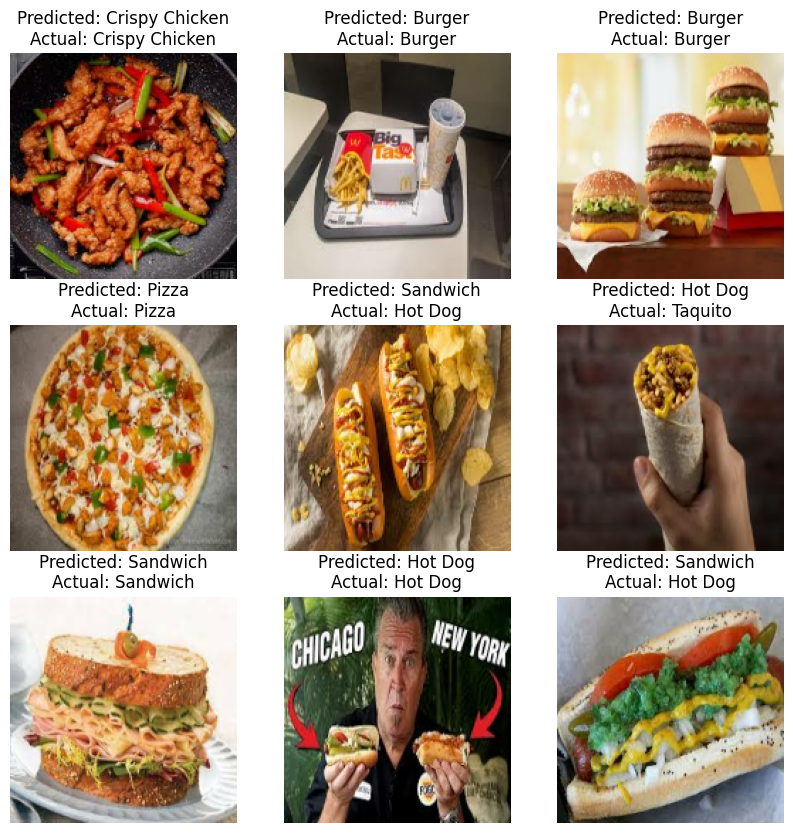

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()

# Predictions
predictions = model.predict_on_batch(image_batch)

# Apply softmax to get class probabilities
predictions = tf.nn.softmax(predictions, axis=-1)

# Get predicted classes
predicted_classes = np.argmax(predictions, axis=1)

# Print predictions, labels, and visualize
print('Predictions:\n', predicted_classes)
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title(f'Predicted: {class_names[predicted_classes[i]]}\nActual: {class_names[label_batch[i]]}')
    plt.axis("off")

plt.show()